# FFT

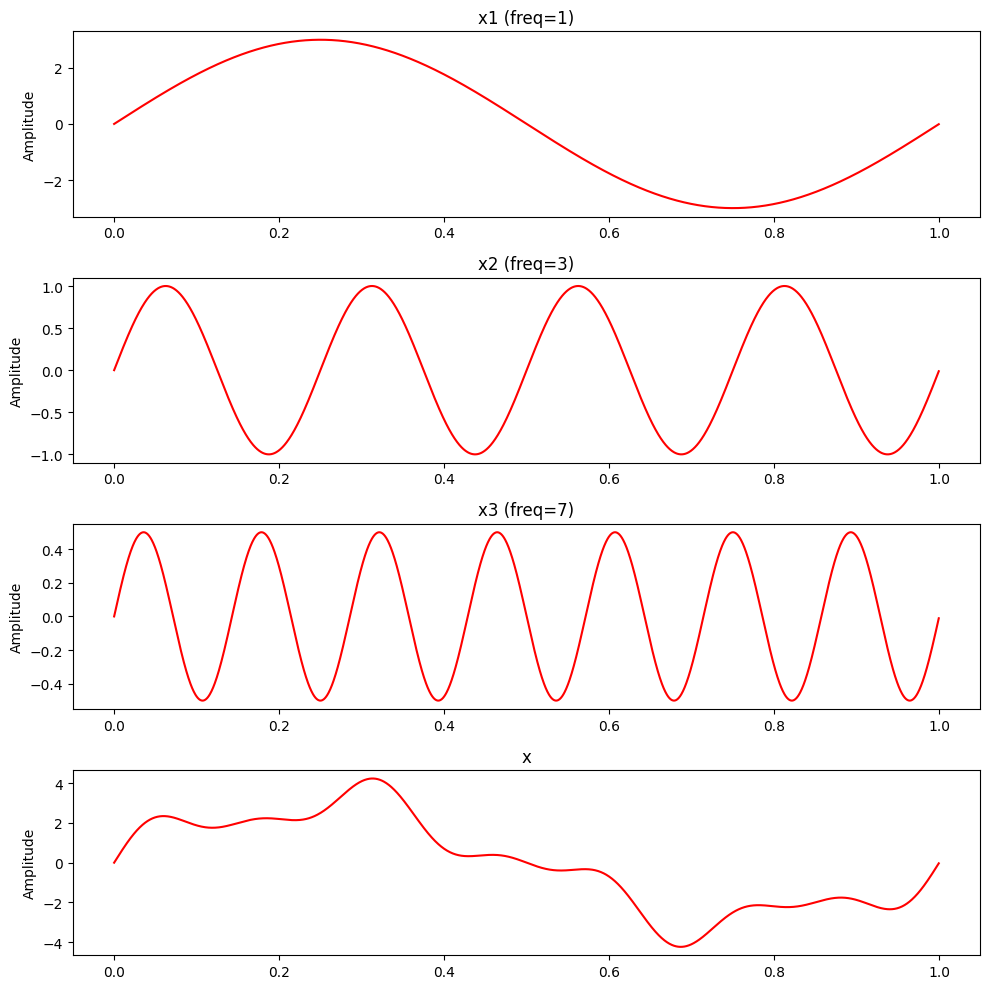

In [154]:
import matplotlib.pyplot as plt
import numpy as np


sampling_rate = 2000
ts = 1.0 / sampling_rate
t = np.arange(0,1,ts)

freq = 1.
x1 = 3 * np.sin(2*np.pi*freq*t)

freq = 4
x2 = np.sin(2*np.pi*freq*t)

freq = 7
x3 = 0.5 * np.sin(2*np.pi*freq*t)

x = x1 + x2 + x3

plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.plot(t, x1, 'r')
plt.ylabel('Amplitude')
plt.title("x1 (freq=1)")

plt.subplot(4, 1, 2)
plt.plot(t, x2, 'r')
plt.ylabel('Amplitude')
plt.title("x2 (freq=3)")

plt.subplot(4, 1, 3)
plt.plot(t, x3, 'r')
plt.ylabel('Amplitude')
plt.title("x3 (freq=7)")

plt.subplot(4, 1, 4)
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title("x")

plt.tight_layout()
plt.show()

/Users/kotarohara/miniforge3/envs/week-1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


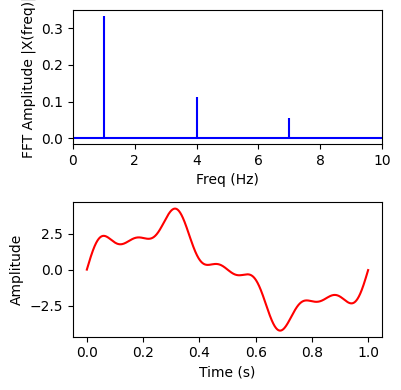

In [162]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N / sampling_rate
freq = n/T

plt.figure(figsize = (4, 4))
plt.subplot(211)

plt.stem(freq, np.abs(X) / np.sum(np.abs(X)), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(212)
recovered_x = ifft(X)
plt.plot(t, recovered_x, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Example: Audio Signal Processing

In [174]:
import IPython

wav_file = 'sound.wav'

IPython.display.Audio(wav_file)

### Reading file

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_file = 'sound.wav'

with wave.open(wav_file) as wav:
    sampling_frequency = wav.getframerate() # Hz
    sample_size = wav.getsampwidth() # Byte
    num_channels = wav.getnchannels()
    num_samples = wav.getnframes()
    waveform = wav.readframes(num_samples)
    waveform = np.frombuffer(waveform, dtype=np.int16)

print(f"Sampling Frequency: {sampling_frequency} [Hz]")
print(f"Sample Size: {sample_size} [Byte]")
print(f"Number of Channels: {num_channels}")
print(f"Number of Samples: {num_samples}")

# Sampling Frequency: 48000 [Hz]
# Sample Size: 2 [Byte]
# Number of Channels: 2
# Number of Samples: 159744

Sampling Frequency: 48000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 2
Number of Samples: 159744


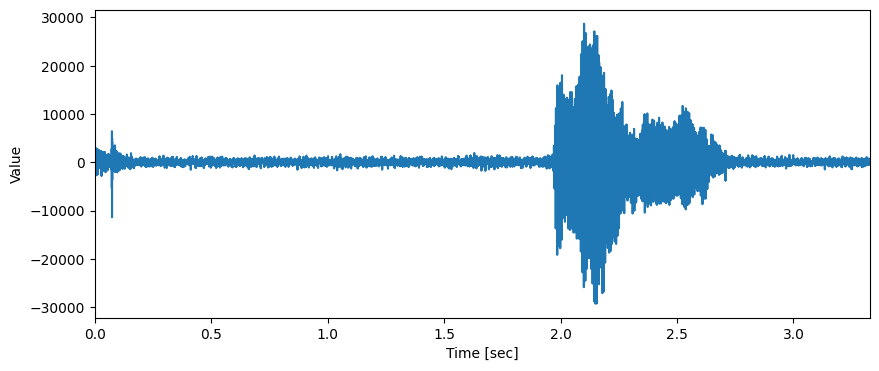

In [179]:
# Extract the first channel
ch0 = waveform[0::2]

# Down sample from 48000 to 16000.
sampling_frequency = sampling_frequency / 3
num_samples = round(num_samples / 3)
ch0 = ch0[::3]

time_axis = np.arange(num_samples) / sampling_frequency

plt.figure(figsize=(10, 4))
plt.plot(time_axis, ch0)
plt.xlabel("Time [sec]")
plt.ylabel("Value")
plt.xlim([0, num_samples / sampling_frequency])
plt.show()

### Spectral decomposition with FFT

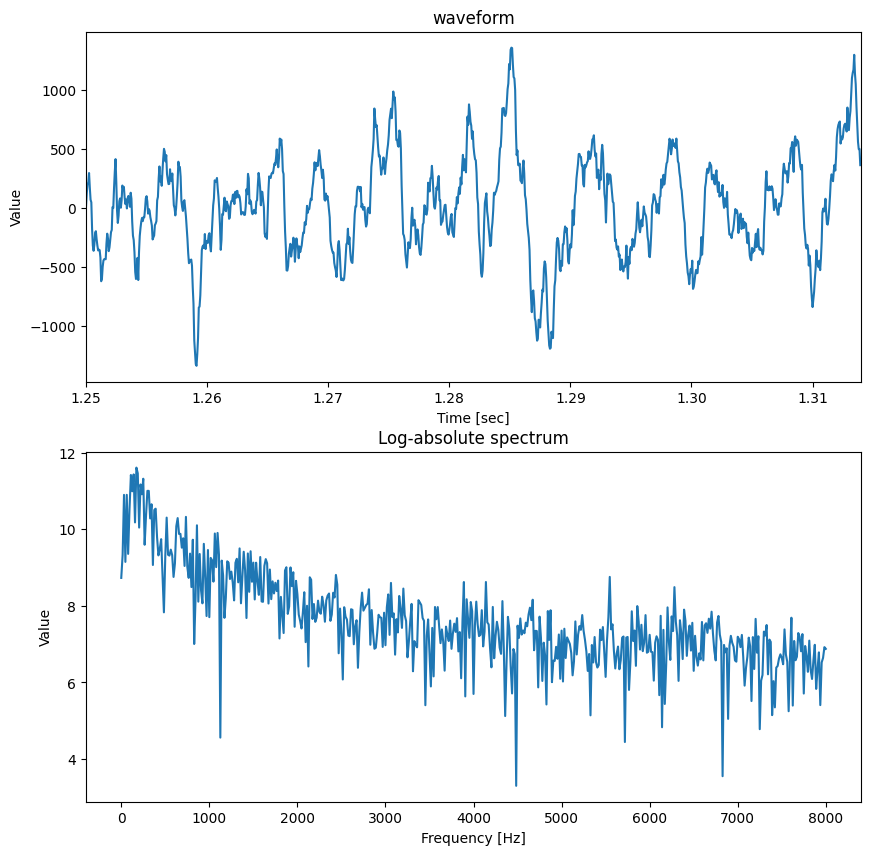

In [3]:
# Extract the first channel
ch0 = waveform[0::2]

# Down sample from 48000 to 16000.
sampling_frequency = sampling_frequency / 3
num_samples = round(num_samples / 3)
ch0 = ch0[::3]

target_time = 1.25
fft_size = 1024
target_index = np.int16(target_time * sampling_frequency)
frame = ch0[target_index:target_index + fft_size]
spectrum = np.fft.fft(frame)
absolute = np.abs(spectrum)
absolute = absolute[:np.int16(fft_size/2) + 1]
log_spectrum = np.log(absolute + 1e-7)

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
time_axis = target_time + np.arange(fft_size) / sampling_frequency

plt.plot(time_axis, frame)

plt.title('waveform')
plt.xlabel('Time [sec]')
plt.ylabel('Value')

plt.xlim([target_time, target_time + fft_size / sampling_frequency])

plt.subplot(2, 1, 2)
freq_axis = np.arange(np.int16(fft_size /2) + 1) * sampling_frequency / fft_size
plt.plot(freq_axis, log_spectrum)
plt.title('Log-absolute spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Value')
plt.show()

# Mel filter bank

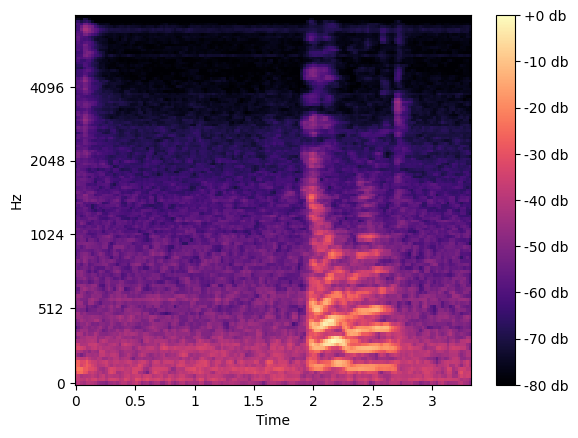

In [19]:
import librosa.display

import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load("sound.wav")
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

fig, ax = plt.subplots()
S_db = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format="%+2.0f db")
plt.show()

# Accelerometer

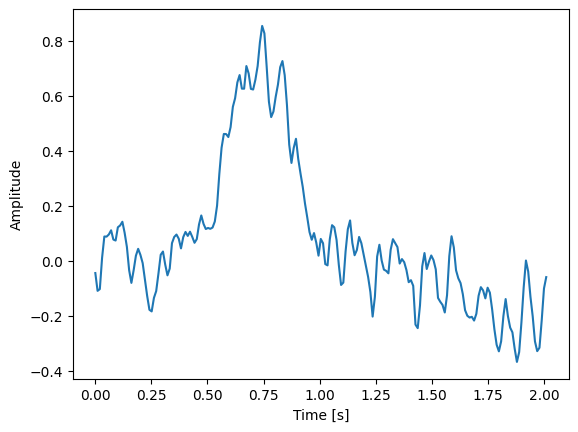

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("./Accelerometer.csv")
t_init = df["seconds_elapsed"][0]
df["seconds_elapsed"] = df["seconds_elapsed"] - t_init
ts = np.array(df["seconds_elapsed"])
xs = np.array(df["x"])

plt.plot(ts, xs)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


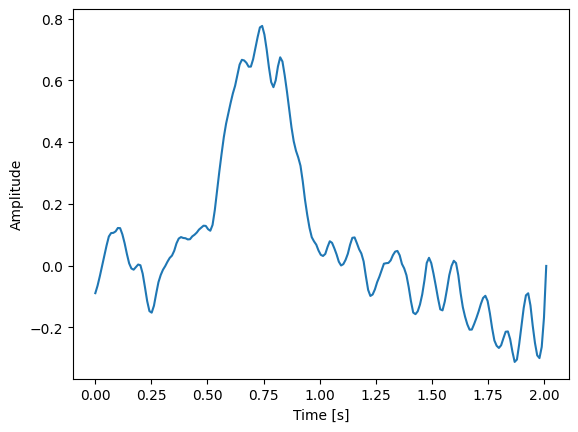

In [128]:
from scipy.signal import savgol_filter
xs_hat = savgol_filter(xs, 11, 3) # window size 51, polynomial order 3

plt.plot(ts, xs_hat)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

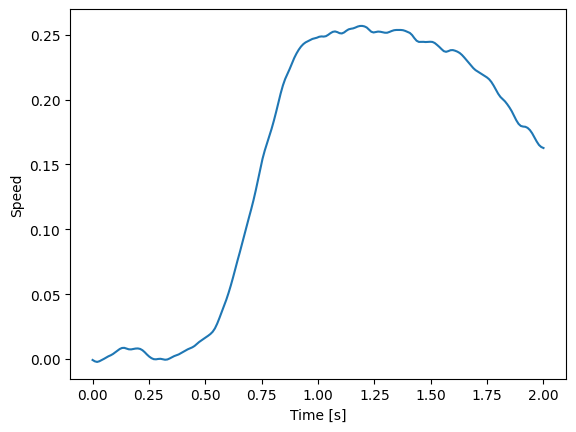

In [8]:
from scipy.integrate import cumulative_trapezoid

vel = cumulative_trapezoid(xs, ts)
t_vel = ts[:len(vel)]

plt.plot(t_vel, vel)
plt.xlabel("Time [s]")
plt.ylabel("Speed")
plt.show()

In [9]:
from scipy.integrate import trapezoid

distance = trapezoid(vel, t_vel)
print(f"Traveled distance is: {distance:0.2f}m")
# Traveled distance is: 0.31m

Traveled distance is: 0.30m
